# 1. Problem Definition

In this exercise, we will be working on a problem where we categorize transactions into two groups, also known as binary classification.

To make this categorization, we will be using various pieces of information, or features, about a transaction. Our goal is to predict whether a credit card transaction is fraudulent or not based on these features.



In [1]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# Data Exploration (exploratory data analysis or EDA)

Our next step is to explore the data. 

We will compare different columns to each other, compare them to the target variable. 

In [2]:
df = pd.read_csv("creditcard.csv")
df.shape # (rows, columns)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Let's see how many fraud (1) and valid (0) samples we have in our dataframe
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [4]:
# Normalized value counts
df.Class.value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

In [5]:
#Check for Missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.shape

(284807, 31)

In [7]:
df.describe().round()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,...,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0
mean,94814.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,...,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,88.0,0.0
std,47488.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,250.0,0.0
min,0.0,-56.0,-73.0,-48.0,-6.0,-114.0,-26.0,-44.0,-73.0,-13.0,...,-35.0,-11.0,-45.0,-3.0,-10.0,-3.0,-23.0,-15.0,0.0,0.0
25%,54202.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-1.0,...,-0.0,-1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,6.0,0.0
50%,84692.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,...,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,22.0,0.0
75%,139320.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0,0.0
max,172792.0,2.0,22.0,9.0,17.0,35.0,73.0,121.0,20.0,16.0,...,27.0,11.0,23.0,5.0,8.0,4.0,32.0,34.0,25691.0,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


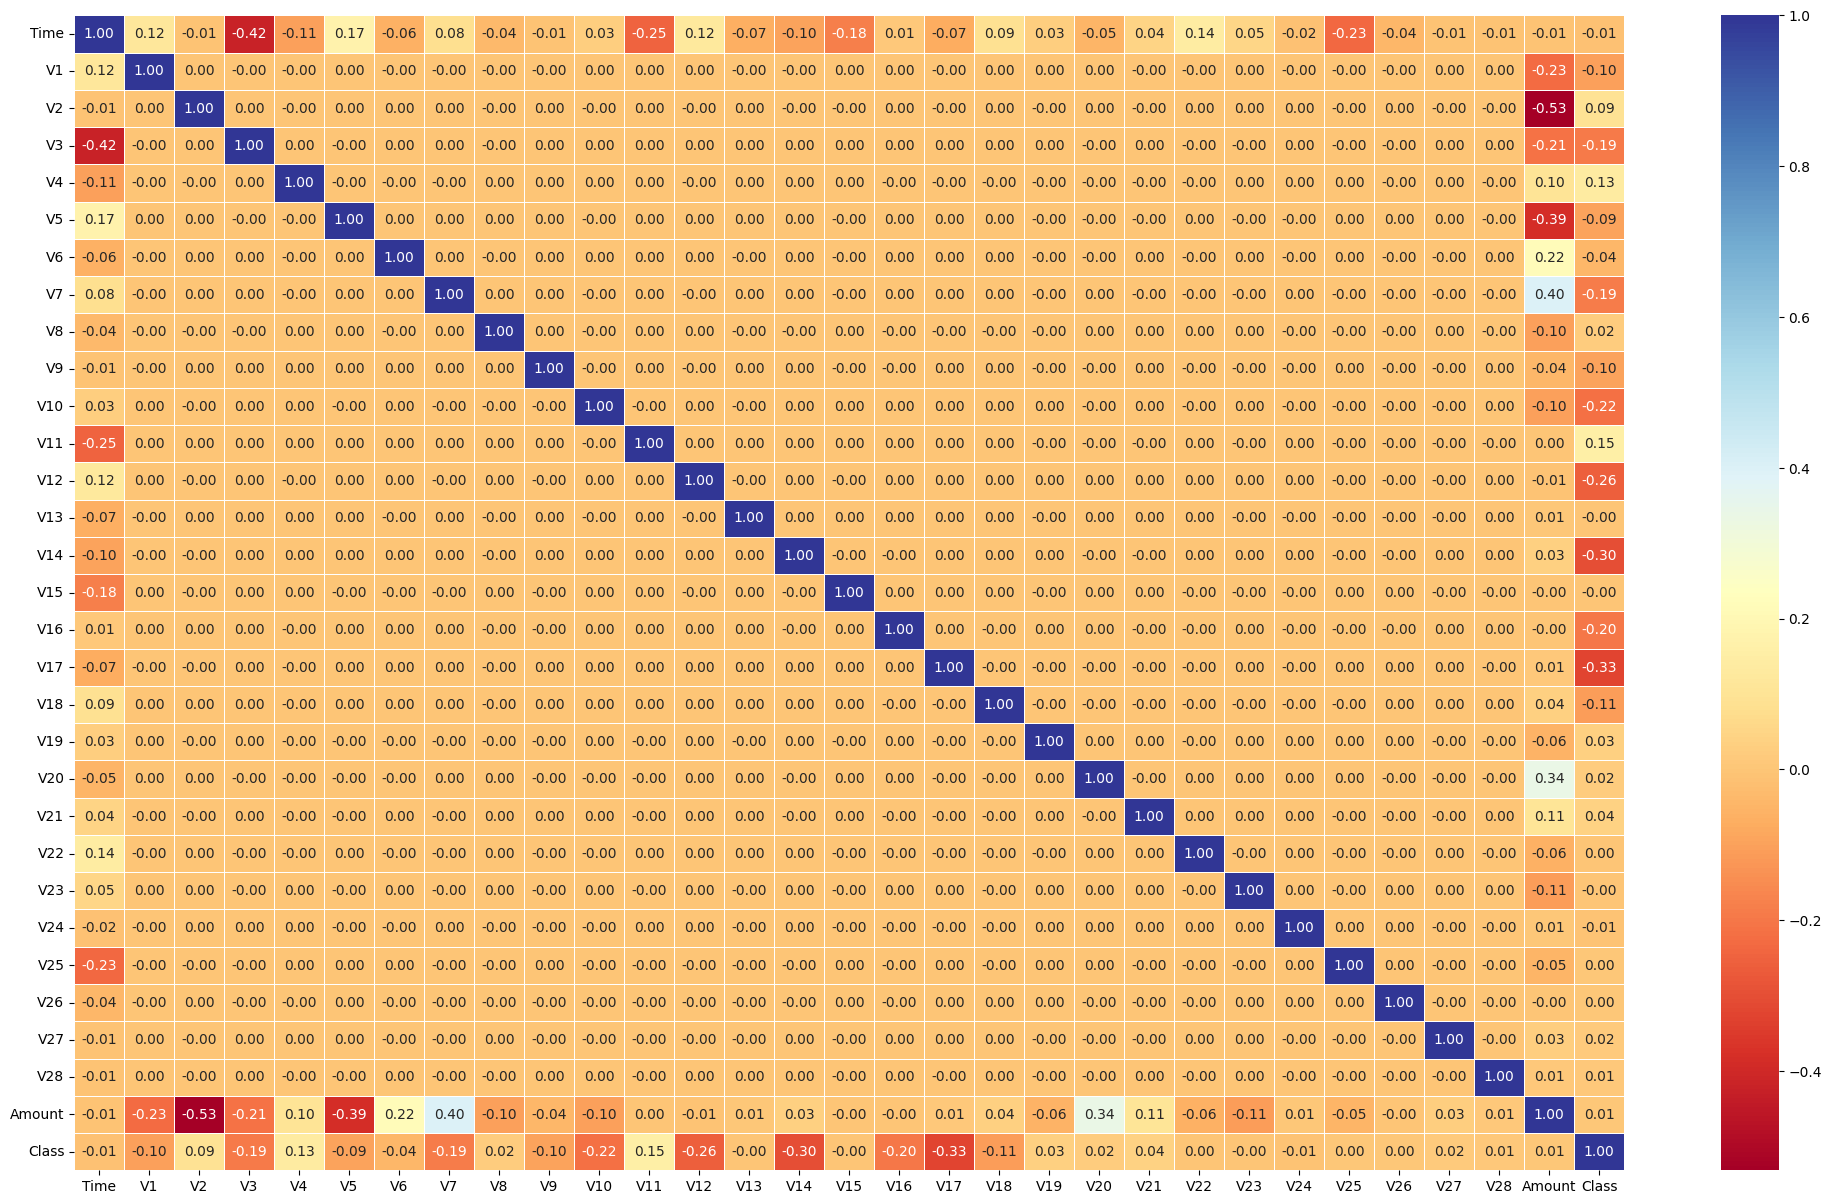

In [10]:
corr_matrix = df.corr()
plt.figure(figsize=(25, 15))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="RdYlBu");

In [11]:
# Everything except target variable
X = df.drop("Class", axis=1)

# Target variable
y = df["Class"].values

In [12]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

In [39]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Entire Dataset

In [44]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(),
          "Xgboost":    GradientBoostingClassifier(),
          "SVC": SVC(),
          "Decision Tree Classifier": DecisionTreeClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data 
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    model_reports = {}
    
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Classification report
        class_report = classification_report(y_test, y_pred)
        model_reports[name] = class_report
        # Confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        # Convert the confusion matrix to a DataFrame for better visualization
        conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
        model_reports[name] += "\n\nConfusion Matrix:\n" + str(conf_matrix_df)
    return model_scores, model_reports

In [47]:
model_scores,model_reports = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)


C:\Users\eharr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\eharr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eharr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

In [50]:
# Print the model scores

model_scores

{'KNN': 0.9983673326077034,
 'Logistic Regression': 0.9986482216214319,
 'Random Forest': 0.9995611109160493,
 'Xgboost': 0.9989466661985184,
 'SVC': 0.9982795547909132,
 'Decision Tree Classifier': 0.9990695551420246}

In [46]:
# Print the model reports
for name, report in model_reports.items():
    print(f"\n{name} Report:")
    print(report)


KNN Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       1.00      0.05      0.10        98

    accuracy                           1.00     56962
   macro avg       1.00      0.53      0.55     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0        56864            0
Actual 1           93            5

Logistic Regression Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.62      0.57      0.59        98

    accuracy                           1.00     56962
   macro avg       0.81      0.79      0.80     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0        56829           35
Actual 1           42           56

Random Forest Report:
              precision    recall

### Tuning models with with [`RandomizedSearchCV`]

In [51]:
# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

# Different DecisionTreeClassifier hyperparameters
dt_grid = {"criterion": ["gini", "entropy"],
           "splitter": ["best", "random"],
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}


### RandomForestClassifier

In [53]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True,
                           n_jobs= -1 )

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [54]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [55]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.9995084442259752

In [75]:
rf = RandomForestClassifier(n_estimators = 510, max_depth= None, min_samples_leaf= 1,min_samples_split=14)
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.77      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



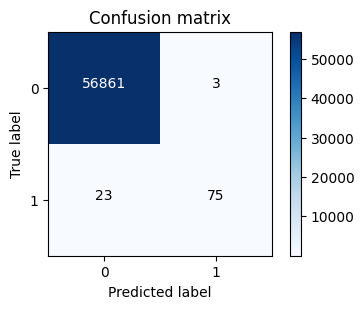

In [76]:
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure(figsize=(4, 3))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

### DecisionTreeClassifier

In [57]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for DecisionTreeClassifier
rs_dt = RandomizedSearchCV(DecisionTreeClassifier(),
                           param_distributions=dt_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True,
                           n_jobs = -1)

# Fit random hyperparameter search model
rs_dt.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [58]:
# Find the best parameters
rs_dt.best_params_

{'splitter': 'best',
 'min_samples_split': 6,
 'min_samples_leaf': 15,
 'max_depth': 10,
 'criterion': 'entropy'}

In [59]:
# Evaluate the randomized search decision tree classifier model
rs_dt.score(X_test, y_test)

0.9994557775359011

In [77]:
dt = DecisionTreeClassifier(criterion = "entropy", splitter = "best", max_depth= 10, min_samples_leaf= 15,min_samples_split=6)
dt = dt.fit(X_train, y_train)
y1_pred = dt.predict(X_test)
print(classification_report(y_test,y1_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.77      0.83        98

    accuracy                           1.00     56962
   macro avg       0.95      0.88      0.91     56962
weighted avg       1.00      1.00      1.00     56962



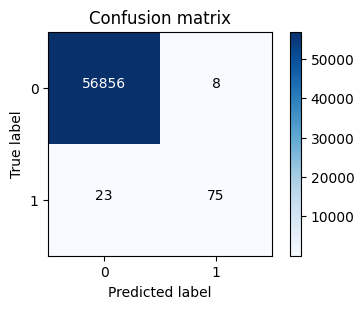

In [79]:
cnf_matrix = confusion_matrix(y_test,y1_pred)
class_names = [0,1]
plt.figure(figsize=(4, 3))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

## Tuning a model with [`GridSearchCV`]

### RandomForestClassifier

In [62]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True,
                           n_jobs = -1)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [63]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [64]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.9995084442259752

### DecisionTreeClassifier

In [66]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for DecisionTreeClassifier
rs_dt = RandomizedSearchCV(DecisionTreeClassifier(),
                           param_distributions=dt_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_dt.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [67]:
# Find the best parameters
rs_dt.best_params_

{'splitter': 'best',
 'min_samples_split': 6,
 'min_samples_leaf': 15,
 'max_depth': 10,
 'criterion': 'entropy'}

In [68]:
# Evaluate the randomized search random forest model
rs_dt.score(X_test, y_test)

0.9994557775359011


## Resampling

## A. Random UnderSampling

In [13]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
# Apply resampling to the training data only
X_train_Uresampled, y_train_Uresampled = rus.fit_resample(X_train, y_train)
X_train_Uresampled.shape, y_train_Uresampled.shape


((788, 30), (788,))

## Logistic Regression
### no GridSearchCv

In [14]:
clf1 = LogisticRegression()
clf1 = clf1.fit(X_train_Uresampled, y_train_Uresampled)
test_under_p_accuracy = clf1.score(X_test, y_test)
test_under_p = clf1.predict(X_test)

In [15]:
test_under_p_accuracy

0.9501597556265581

In [16]:
print(classification_report(y_test, test_under_p) )

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56864
           1       0.03      0.92      0.06        98

    accuracy                           0.95     56962
   macro avg       0.52      0.93      0.52     56962
weighted avg       1.00      0.95      0.97     56962



### GridSearchCv

In [17]:
param_grid = {'penalty':['l1','l2'],'C':[0.01,0.1,1,10,100]}
clf1 = GridSearchCV(LogisticRegression(), param_grid,cv=5)
clf1 = clf1.fit(X_train_Uresampled, y_train_Uresampled)
clf1.best_params_



C:\Users\eharr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\eharr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

{'C': 0.01, 'penalty': 'l2'}

In [19]:
clf1 = LogisticRegression(C=0.01,penalty='l2')
clf1 = clf1.fit(X_train_Uresampled, y_train_Uresampled)
test_under_p = clf1.predict(X_test)
print(classification_report(y_test, test_under_p))



              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.83      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.90      0.54     56962
weighted avg       1.00      0.97      0.98     56962



In [20]:
test_under_p 

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [21]:
y_test

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
# Assuming you have calculated the confusion matrix and stored it in a variable
conf_matrix = confusion_matrix(y_test, test_under_p)

# Convert the entries in the confusion matrix to integers
conf_matrix_int = np.int64(conf_matrix)

# Print the integer confusion matrix
print(conf_matrix_int)

[[55216  1648]
 [   17    81]]


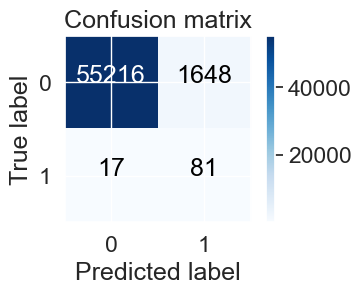

In [32]:
cnf_matrix = confusion_matrix(y_test,test_under_p)
class_names = [0,1]
plt.figure(figsize=(4, 3))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

## Random Forest
### no GridSearchCv

In [ ]:
clf2 =RandomForestClassifier()
clf2 = clf2.fit(X_train_Uresampled, y_train_Uresampled)
test_under_p_accuracy = clf2.score(X_test, y_test)
test_under_p_accuracy 

In [35]:
test_under_p = clf2.predict(X_test)
print(classification_report(y_test, test_under_p))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.93      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [36]:
### GridSearchCv

In [37]:
param_grid = {'criterion':['gini','entropy'],'max_depth': np.arange(2,10), 'min_samples_split':np.arange(2,10),'min_samples_leaf':np.arange(1,10)}
clf2 = GridSearchCV(RandomForestClassifier(),param_grid,cv=5)
clf2 = clf2.fit(X_train_Uresampled, y_train_Uresampled)
clf2.best_params_



{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 4,
 'min_samples_split': 8}

In [39]:
clf2 = RandomForestClassifier(criterion='entropy', max_depth= 8,min_samples_leaf= 4,min_samples_split=8)
clf2 = clf2.fit(X_train_Uresampled, y_train_Uresampled)
test_under_p = clf2.predict(X_test)
print(classification_report(y_test, test_under_p))



              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.92      0.18        98

    accuracy                           0.99     56962
   macro avg       0.55      0.95      0.58     56962
weighted avg       1.00      0.99      0.99     56962



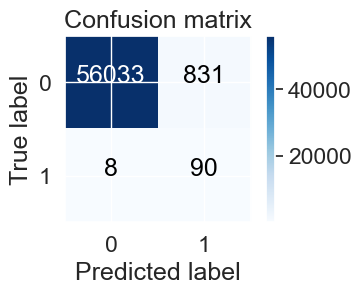

In [40]:
cnf_matrix = confusion_matrix(y_test,test_under_p)
class_names = [0,1]
plt.figure(figsize=(4, 3))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

## Decision Tree Classifier

### noGrid

In [42]:
clf3 =DecisionTreeClassifier()
clf3 = clf3.fit(X_train_Uresampled, y_train_Uresampled)

In [43]:
test_under_p_accuracy = clf3.score(X_test,y_test)
test_under_p_accuracy

0.9050595133597837

In [44]:
test_under_p = clf3.predict(X_test)
print(classification_report(y_test, test_under_p) )

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56864
           1       0.02      0.93      0.03        98

    accuracy                           0.91     56962
   macro avg       0.51      0.92      0.49     56962
weighted avg       1.00      0.91      0.95     56962



In [45]:
### GridSearchCV

In [48]:
param_grid = {'criterion':['gini','entropy'],'max_depth': np.arange(2,10), 'min_samples_split':np.arange(2,10),'min_samples_leaf':np.arange(1,10)}
clf3 = GridSearchCV(DecisionTreeClassifier(), param_grid,cv=5)
clf3 = clf3.fit(X_train_Uresampled,y_train_Uresampled)
clf3.best_params_



{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 6}

In [50]:
clf3 = RandomForestClassifier(criterion='gini', max_depth= 3,min_samples_leaf=1,min_samples_split=6)
clf3 = clf3.fit(X_train_Uresampled, y_train_Uresampled)
test_under_p = clf3.predict(X_test)
print(classification_report(y_test, test_under_p))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.24      0.88      0.37        98

    accuracy                           0.99     56962
   macro avg       0.62      0.94      0.68     56962
weighted avg       1.00      0.99      1.00     56962



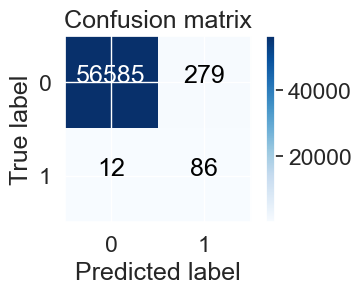

In [51]:
cnf_matrix = confusion_matrix(y_test,test_under_p)
class_names = [0,1]
plt.figure(figsize=(4, 3))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

# SMOTE

In [80]:
# Define resampling method and split into train and test
from imblearn.over_sampling import SMOTE
method = SMOTE(random_state=42)
# Apply resampling to the training data only
X_resampled, y_resampled = method.fit_resample(X_train, y_train)
X_resampled.shape, y_resampled.shape

((454902, 30), (454902,))

## Logistic Regression

In [14]:
# Continue fitting the model and obtain predictions
model1 = LogisticRegression()
model1.fit(X_resampled, y_resampled)
test_over_p_accuracy = model1.score(X_test, y_test)
test_over_p_accuracy

0.9801973245321443

In [15]:
test_over_p = model1.predict(X_test)
print(classification_report(y_test, test_over_p))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.90      0.13        98

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962



### GridSearchCv

In [16]:
param_grid = {'penalty':['l1','l2'],'C':[0.01,0.1,1,10,100]}
model1 = GridSearchCV(LogisticRegression(), param_grid,cv=5)
model1 = model1.fit(X_resampled, y_resampled)
model1.best_params_


C:\Users\eharr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\eharr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

{'C': 1, 'penalty': 'l2'}

In [17]:
model1 = LogisticRegression(C=1,penalty='l2')
model1 = model1.fit(X_resampled, y_resampled)
test_over_p = model1.predict(X_test)
print(classification_report(y_test, test_over_p))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.90      0.13        98

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962



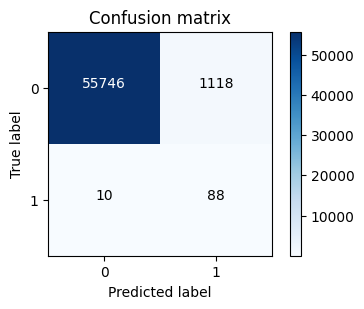

In [20]:
cnf_matrix = confusion_matrix(y_test,test_over_p)
class_names = [0,1]
plt.figure(figsize=(4, 3))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

## DecisionTreeClassifier

In [21]:
model2 = DecisionTreeClassifier()
model2.fit(X_resampled, y_resampled)
test_over_p_accuracy = model2.score(X_test, y_test)
test_over_p_accuracy

0.9980513324672589

In [22]:
test_over_p = model1.predict(X_test)
print(classification_report(y_test, test_over_p))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.90      0.13        98

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962



### GridSearchCv

In [82]:
param_grid = {'criterion':['gini','entropy'],'max_depth': np.arange(2,10), 'min_samples_split':np.arange(2,10),'min_samples_leaf':np.arange(1,10)}
model2 = GridSearchCV(DecisionTreeClassifier(), param_grid,cv=5)
model2 = model2.fit(X_resampled, y_resampled)
model2.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 4}

In [ ]:
model2 = RandomForestClassifier(criterion='gini', max_depth= 3,min_samples_leaf=1,min_samples_split=6)
model2 = model2.fit(X_resampled, y_resampled)
test_over_p = model2.predict(X_test)
print(classification_report(y_test, test_over_p))

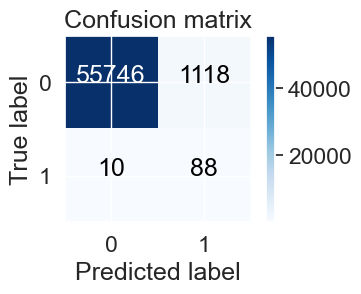

In [65]:
cnf_matrix = confusion_matrix(y_test,test_over_p)
class_names = [0,1]
plt.figure(figsize=(4, 3))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

## RandomForestClassifier

In [24]:
# Continue fitting the model and obtain predictions
model3 = RandomForestClassifier(n_jobs=-1)
model3.fit(X_resampled, y_resampled)
test_over_p_accuracy = model3.score(X_test, y_test)

In [25]:
test_over_p = model3.predict(X_test)
print(classification_report(y_test, test_over_p))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



### GridSearchCV

In [ ]:
param_grid = {'criterion':['gini','entropy'],'max_depth': np.arange(2,10), 'min_samples_split':np.arange(2,10),'min_samples_leaf':np.arange(1,10), 'n_jobs': [-1]}
model3 = GridSearchCV(RandomForestClassifier(),param_grid,cv=5)
model3 = model3.fit(X_resampled, y_resampled)
model3.best_params_

C:\Users\eharr\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
model3 = RandomForestClassifier(criterion='entropy', max_depth= 8,min_samples_leaf= 4,min_samples_split=8)
model3 = model3.fit(X_resampled, y_resampled)
test_over_p = model3.predict(X_test)
print(classification_report(y_test, test_over_p))

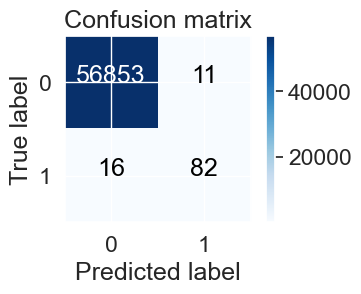

In [68]:
cnf_matrix = confusion_matrix(y_test,test_over_p)
class_names = [0,1]
plt.figure(figsize=(4, 3))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

# Voting Classifier

In [18]:
from sklearn.ensemble import VotingClassifier

  
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = DecisionTreeClassifier()
ensemble_model = VotingClassifier(estimators=[('lr', clf1),
('rf', clf2), ('gnb', clf3)], voting='hard')
ensemble_model.fit(X_train, y_train)
pred_v =  ensemble_model.predict(X_test)



C:\Users\eharr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
accuracy_score = ensemble_model.score(X_test, y_test)
accuracy_score

0.9995259997893332

In [34]:
# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, pred_v)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[56860     4]
 [   23    75]]


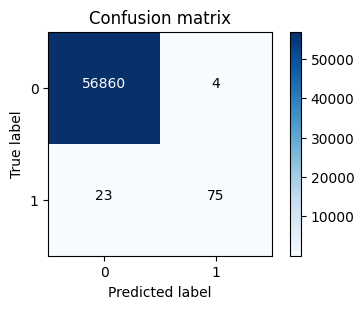

In [36]:
conf_matrix = confusion_matrix(y_test,pred_v)
class_names = [0,1]
plt.figure(figsize=(4, 3))
plot_confusion_matrix(conf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

In [25]:
print(classification_report(y_test, pred_v))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.77      0.85        98

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
### Soft

In [23]:

ensemble_model2 =VotingClassifier(estimators=[('lr', clf1), ('rf', clf2),
('gnb', clf3)], voting='soft', weights=[2,1,1])
ensemble_model2.fit(X_train, y_train)
pred_v2 =  ensemble_model2.predict(X_test)

C:\Users\eharr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
accuracy_score2 = ensemble_model2.score(X_test, y_test)
accuracy_score2

0.9991573329588147

In [28]:
# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, pred_v2)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[56850    14]
 [   34    64]]


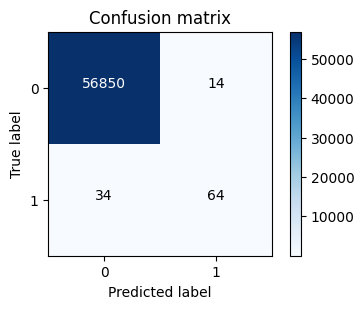

In [33]:
conf_matrix = confusion_matrix(y_test,pred_v2)
class_names = [0,1]
plt.figure(figsize=(4, 3))
plot_confusion_matrix(conf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

In [26]:
print(classification_report(y_test, pred_v2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.65      0.73        98

    accuracy                           1.00     56962
   macro avg       0.91      0.83      0.86     56962
weighted avg       1.00      1.00      1.00     56962

